Trong phần này, ta sẽ tìm hiểu các biến nào có tác động đến giá xe và dựa trên những biến đó ta sẽ đưa ra mô hình dự đoán giá xe với một mức độ tin cậy nhất định.

Trước tiên, ta cần khai báo các thư viện sau:

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 1. Phân tích

Sử dụng dữ liệu từ tập dữ liệu *cars_data_processed.csv* để điều tra mối quan hệ giữa biến **price** - giá tiền (biến hồi quy) và biến **fuelCapacity** - lượng nhiên liệu (biến phụ thuộc).

In [ ]:
cars = pd.read_csv('cars_data_processed.csv', sep = '\t') # Tải dữ liệu
cars.head()

,Unnamed: 0,name,brand,price,length,height,width,weightTotal,modelDate,fuelType,numberOfAxles,numberOfDoors,numberOfForwardGears,seatingCapacity,vehicleTransmission,cargoVolume,roofLoad,accelerationTime,fuelCapacity,speed,payload,trailerWeight,vEengineType,vEengineDisplacement,torque
0,3,Subaru SVX,Subaru,53.090,4625,1300,1770,2045,1992,gasoline,2,3,4,5,Automatic,466.0,50,8.6,3319,235,435,1610,fuel engine,3319,309
1,5,Subaru Impreza 2.5 WRX STi AWD,Subaru,52.285,4465,1440,1740,1900,2005,gasoline,2,4,6,5,Manual transmission,395.0,80,5.4,2457,255,430,1470,fuel engine,2457,392
2,6,Subaru Impreza 2.0R AWD,Subaru,26.565,4465,1440,1740,1780,2005,gasoline,2,4,5,5,Manual transmission,401.0,80,8.8,1994,210,490,1290,fuel engine,1994,186
3,7,Subaru Impreza 2.0R AWD,Subaru,28.565,4465,1440,1740,1780,2005,gasoline,2,4,4,5,Automatic,401.0,80,11.6,1994,191,450,1330,fuel engine,1994,186
4,8,Subaru Impreza 2.5 WRX AWD,Subaru,33.785,4465,1440,1740,1860,2005,gasoline,2,4,5,5,Manual transmission,401.0,80,5.9,2457,230,480,1380,fuel engine,2457,320


In [ ]:
cars.shape

(12913, 25)

Đầu tiên, ta vẽ biểu đồ phân tán để thấy được sự trực quan.

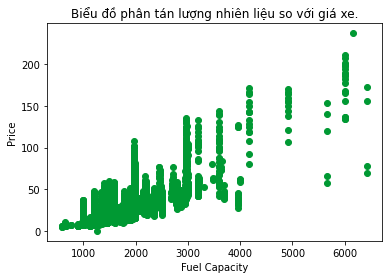

In [ ]:
plt.scatter(cars.fuelCapacity, cars.price, c = '#009933') # Vẽ biểu đồ phân tán
plt.ylabel('Price')
plt.xlabel('Fuel Capacity')
plt.title('Biểu đồ phân tán lượng nhiên liệu so với giá xe.')
plt.show()

* **Nhận xét**: 

  Ta thấy có sự tương quan giữa giá tiền và lượng nhiên liệu, lượng nhiên liệu tăng thì giá tiền cũng tăng.



Tiếp theo, ta tìm các thông số cho mô hình hồi quy đơn biến: $$Y_i= \beta_0+ \beta_1x_i+ \varepsilon_i, i= 1,...,n$$ như sau:

In [ ]:
model = ols('price~fuelCapacity', data = cars) # Xây dựng mô hình
fit = model.fit()
b0, b1 = fit.params
fit.params

Intercept      -9.823174
fuelCapacity    0.022818
dtype: float64

Mô hình bình phương cực tiểu bên trên được xây dựng thông qua hàm **ols**.

Kết quả trên trả về ước lượng bình phương cực tiểu, và ta có $\widehat{\beta_0}= -9.823$ và $\widehat{\beta_1}= 0.023$.

Các kết quả nhận được:

In [ ]:
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                 1.062e+04
Date:                Tue, 25 Jan 2022   Prob (F-statistic):               0.00
Time:                        06:52:55   Log-Likelihood:                -50405.
No. Observations:               12913   AIC:                         1.008e+05
Df Residuals:                   12911   BIC:                         1.008e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -9.8232      0.399    -24.601   

**Thông số quan trọng**:

> 
* R-squared: giá trị hệ số xác định $R^2 = 0.451$
* Prob (F-statistic): $p-value\approx 0.0$
* fuelCapacity: $\widehat{\beta_1}= 0.023$






**Suy ra**:

> Có sự tương quan giữa giá xe và lượng nhiên liệu (bằng chứng là p-value xấp xỉ bằng 0).

> Sự biến thiên của giá xe có lượng nhiên liệu khác nhau là 0.023 (nghìn euro)

> Mô hình hồi quy đơn biến cho thấy chỉ có 45.1% giá xe được giải thích bởi lượng nhiên liệu





## 2. Phân tích phương sai (ANOVA)

Do đó, ta cần thêm các biến phụ thuộc khác và tiến hành phân tích phương sai của mô hình. 

Trước tiên, ta sẽ vẽ biểu đồ phân tán để thấy được sự tương quan giữa các biến.

In [ ]:
def scatter(x,fig): # Xây dựng hàm scatter vẽ biểu đồ
    plt.subplot(7,3,fig)
    plt.scatter(cars[x],cars['price'], c = '#009933')
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

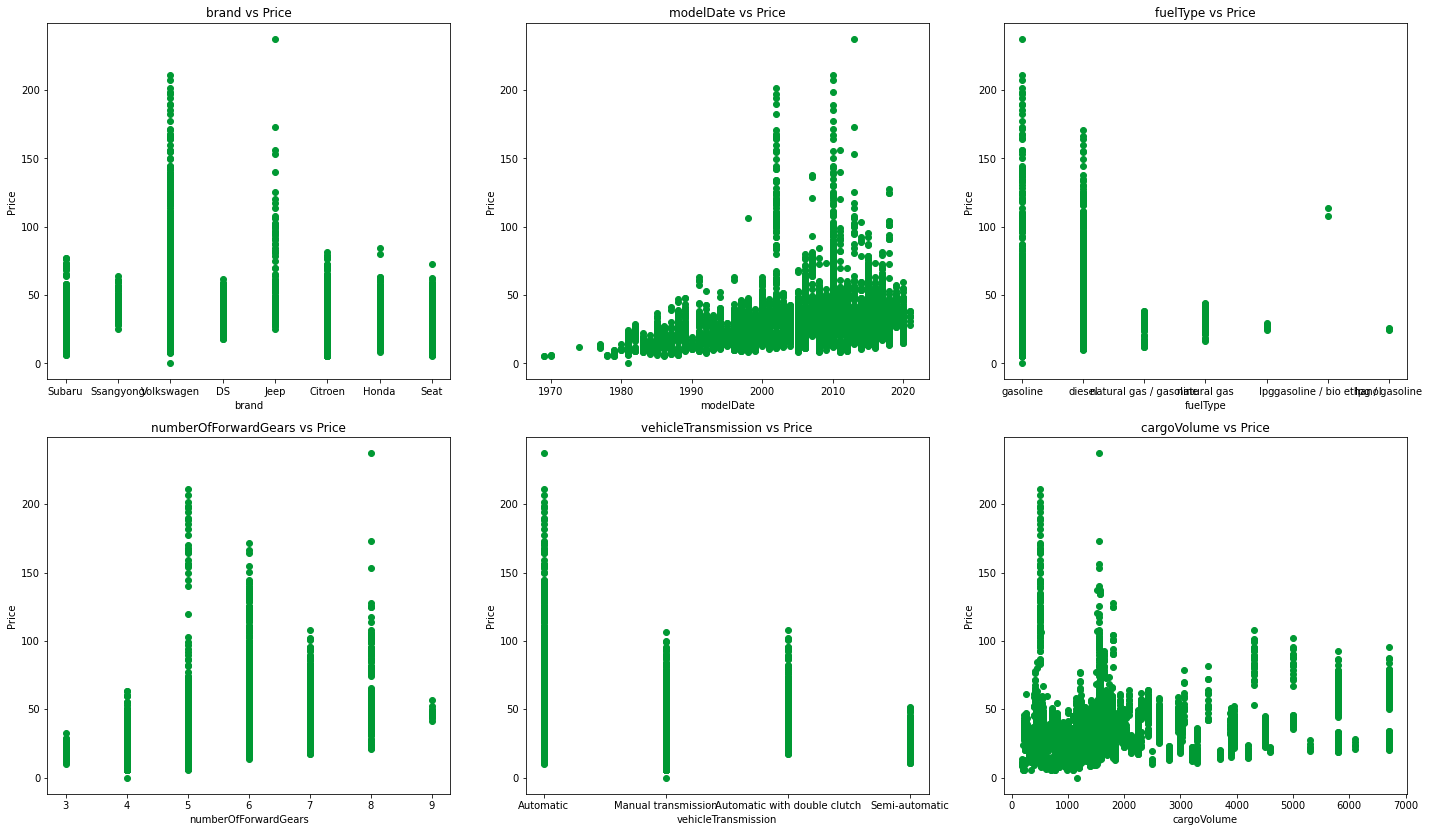

In [ ]:
plt.figure(figsize=(20,40))
scatter('brand', 1)
scatter('modelDate', 2)
scatter('fuelType', 3)
scatter('numberOfForwardGears', 4)
scatter('vehicleTransmission', 5)
scatter('cargoVolume', 6)
plt.tight_layout()

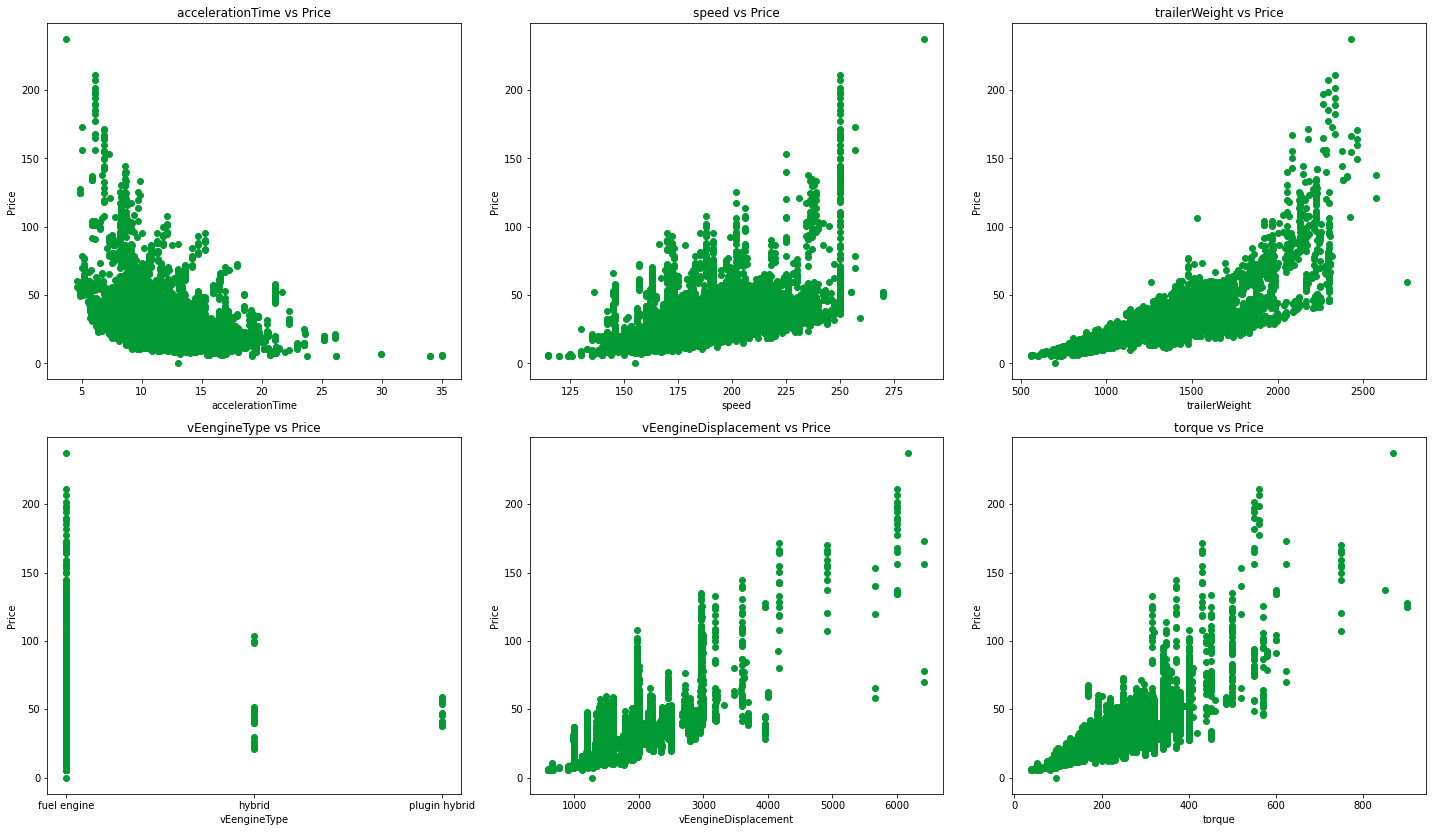

In [ ]:
plt.figure(figsize=(20,40))
scatter('accelerationTime', 1)
scatter('speed', 2)
scatter('trailerWeight', 3)
scatter('vEengineType', 4)
scatter('vEengineDisplacement', 5)
scatter('torque', 6)
plt.tight_layout()

Lựa chọn biến

In [ ]:
remaining_features = {'C(brand)', 'modelDate', 'C(fuelType)',
          'numberOfForwardGears','C(vehicleTransmission)',
          'cargoVolume', 'accelerationTime', 'fuelCapacity', 'speed',
          'trailerWeight', 'vEengineDisplacement', 'torque'}
selected_features = []
while remaining_features :
    PF = [] # Danh sách (P value , biến)
    for f in remaining_features :
        temp = selected_features + [f] # các biến tạm thời
        formula = 'price~' + '+'.join(temp)
        fit = ols(formula, data = cars).fit()
        pval = fit.pvalues[-1]
        if pval < 0.05:
            PF.append((pval, f))
    if PF: # Nếu rỗng
        PF.sort(reverse = True)
        (best_pval, best_f) = PF.pop()
        remaining_features.remove(best_f)
        print('feature {} with P-value = {:.2E}'.format(best_f, best_pval))
        selected_features.append(best_f)
    else:
        break

feature accelerationTime with P-value = 0.00E+00
feature C(brand) with P-value = 0.00E+00
feature C(fuelType) with P-value = 0.00E+00
feature C(vehicleTransmission) with P-value = 0.00E+00
feature fuelCapacity with P-value = 0.00E+00
feature modelDate with P-value = 0.00E+00
feature torque with P-value = 0.00E+00
feature vEengineDisplacement with P-value = 0.00E+00
feature trailerWeight with P-value = 3.43E-192
feature cargoVolume with P-value = 2.19E-156
feature numberOfForwardGears with P-value = 2.48E-33
feature speed with P-value = 2.08E-08


In [ ]:
# Xây dựng mô hình
anova = ols('price~C(brand)+modelDate+C(fuelType)'
          +'+numberOfForwardGears+C(vehicleTransmission)'
          +'+cargoVolume+accelerationTime+fuelCapacity+speed'
          +'+trailerWeight+vEengineDisplacement+torque', data = cars) 
fit = anova.fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     2093.
Date:                Tue, 25 Jan 2022   Prob (F-statistic):               0.00
Time:                        06:53:29   Log-Likelihood:                -44022.
No. Observations:               12913   AIC:                         8.809e+04
Df Residuals:                   12888   BIC:                         8.828e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

* **Nhận xét**: ta thấy có giá xe đã được giải thích gần 80% 

## Dự đoán

Để dự đoán ta dùng hàm get_prediction để trả về giá trị dự đoán và khoảng tin cậy.

Hoặc đơn giản hơn là hàm predict để trả về giá trị dự đoán.

In [ ]:
x = {'brand': ['Subaru'], 'modelDate': [2005],
          'fuelType': ['gasoline'], 'numberOfForwardGears': [5], 'vehicleTransmission': ['Automatic'],
          'cargoVolume': [460.0], 'accelerationTime': [10.5], 'fuelCapacity': [3000], 'speed': [210],
          'trailerWeight': [1300], 'vEengineDisplacement': [2500], 'torque': [350]} # input dữ liệu bằng dictionary
pred = fit.get_prediction(x)
pred.summary_frame(alpha = 0.05).unstack()

mean           0    55.041550
mean_se        0     0.510611
mean_ci_lower  0    54.040677
mean_ci_upper  0    56.042422
obs_ci_lower   0    40.650338
obs_ci_upper   0    69.432762
dtype: float64

## Xác thực mô hình

Text(0.5, 0, 'fitted values')

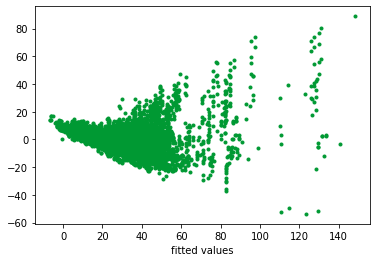

In [ ]:
plt.plot(fit.fittedvalues, fit.resid, '.', c = '#009933')
plt.xlabel('fitted values')

* **Nhận xét**: Các giá trị (tăng dần) gần như đối xứng qua Oy.